# PUBLIC TRANSPORTATION : TRANSJAKARTA
---

Transjakarta merupakan sistem transportasi Bus Rapid Transit (BRT) pertama di Asia Tenggara yang mulai beroperasi pada 15 Januari 2004. Transjakarta dibangun dengan tujuan menyediakan transportasi publik yang cepat dan terjangkau bagi masyarakat Jakarta. Transjakarta menggunakan konsep jalur khusus bus untuk mengurangi kemacetan serta meningkatkan mobilitas masyarakat Jakarta. Sistem ini telah terintegrasi dengan mikrotrans yang melayani area yang tidak terjangkau langsung oleh transjakarta. Selain mikrotrans, transjakarta juga sudah terintegrasi dengan angkutan umum lainnya seperti KRL, MRT dan LRT.

## Roleplay
---

Divisi Data Analyst di Transjakarta diminta untuk menganalisis serta memberikan rekomendasi untuk perusahaan terkait Morning Rush Hour, Evening Rush Hour dan Non Rush Hour pada hari Senin, Selasa, Rabu, Kamis dan Jumat.

## Pernyataan Masalah
---

1. Bagaimana karakteristik demografi pengguna Transjakarta pada hari kerja?
- Bagaimana distribusi pengguna berdasarkan jenis kelamin?
- Apa saja metode pembayaran yang paling sering digunakan oleh pengguna?
- Bagaimana sebaran usia pengguna Transjakarta?
2. Bagaimana jumlah penumpang Transjakarta bervariasi berdasarkan waktu?
- Bagaimana tren jumlah penumpang berdasarkan tanggal?
- Pada hari apa jumlah penumpang tertinggi dan terendah terjadi?
- Pada jam berapa terjadi lonjakan atau penurunan jumlah penumpang?
3. Bagaimana pola perjalanan dan penggunaan rute Transjakarta pada hari kerja?
- Halte mana pengguna paling banyak melakukan tap in?
- Halte mana pengguna paling banyak melakukan tap out?
- Koridor mana saja yang memiliki jumlah penumpang terbanyak?

## Data
---

In [1]:
# import library
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import date library
from datetime import datetime

from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df_tj = pd.read_csv('Transjakarta.csv')
df = df_tj.copy()

## Deskripsi Kolom
---

Terdapat 22 kolom pada dataset transjakarta:

- transID: ID transaksi unik untuk setiap transaksi.
- payCardID: Identifikasi utama pelanggan, yaitu kartu yang digunakan sebagai tiket untuk masuk dan keluar.
- payCardBank: Nama bank penerbit kartu pelanggan.
- payCardName: Nama pelanggan yang tertanam di dalam kartu.
- payCardSex: Jenis kelamin pelanggan yang tertanam di dalam kartu.
- payCardBirthDate: Tahun lahir pelanggan.
- corridorID: ID koridor/rute sebagai kunci untuk pengelompokan rute.
- corridorName: Nama koridor/rute yang mencantumkan titik awal dan akhir setiap rute.
- direction: 0 untuk Pergi, 1 untuk Pulang. Menunjukkan arah perjalanan.
- tapInStops: ID halte masuk untuk mengidentifikasi nama halte tempat pelanggan masuk.
- tapInStopsName: Nama halte masuk tempat pelanggan melakukan tap masuk.
- tapInStopsLat: Garis lintang (latitude) dari halte masuk.
- tapInStopsLon: Garis bujur (longitude) dari halte masuk.
- stopStartSeq: Urutan halte, misalnya halte pertama, halte kedua, dll., yang terkait dengan arah perjalanan.
- tapInTime: Waktu pelanggan melakukan tap masuk (tanggal dan waktu).
- tapOutStops: ID halte keluar untuk mengidentifikasi nama halte tempat pelanggan keluar.
- tapOutStopsName: Nama halte keluar tempat pelanggan melakukan tap keluar.
- tapOutStopsLat: Garis lintang (latitude) dari halte keluar.
- tapOutStopsLon: Garis bujur (longitude) dari halte keluar.
- stopEndSeq: Urutan halte, misalnya halte pertama, halte kedua, dll., yang terkait dengan arah perjalanan.
- tapOutTime: Waktu pelanggan melakukan tap keluar (tanggal dan waktu).
- payAmount: Jumlah biaya yang dibayarkan pelanggan. Beberapa perjalanan mungkin gratis, beberapa lainnya berbayar.

## Data Understanding
---

Data understanding merupakan tahapan awal pengolahan data sebelum dilakukan data cleansing. Data understanding bertujuan untuk memahami struktur data, mengevaluasi kualitas data (data hilang, data duplikat, data tidak valid), mengetahui distribusi data, mengidentifikasi outlier dan mengidentifikasi hubungan antar variabel.

In [3]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [5]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

Berdasarkan dataset diatas, kita dapat melihat bahwa:

- dataset transjakarta terdiri dari 37900 baris dan 22 kolom
- terdapat missing value pada kolom:
    - `corridorID`
    - `corridorName`
    - `tapInStops`
    - `tapOutStops`
    - `tapOutStopsName`
    - `tapOutStopsLat`
    - `tapOutStopsLon`
    - `stopEndSeq`
    - `tapOutTime`
    - `payAmount`
- kolom `payCardID` memiliki tipe data `int64`, untuk mempermudah analisis perlu diubah tipe data menjadi `object`
- kolom `payCardBank` dan `payCardSex` memiliki tipe data `object`, untuk mempermudah analisis perlu diubah tipe data menjadi `category`
- kolom `tapInTime` dan `tapOutTime` memiliki tipe data `object`, untuk mempermudah analisis perlu diubah tipe data menjadi `date and time`

In [6]:
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


In [7]:
df.describe(include = 'object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,FMZZ963S4B68ZP,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-24 06:53:50
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


## Data Cleansing
---
Setelah melakukan data understanding, maka tahap berikutnya adalah data cleansing. Pada tahap ini dapat melakukan pengisian missing value, menghapus baris atau kolom, mengganti isi value, mengecek data duplikat dan mengubah tipe data.

Menghapus data yang memiliki nilai null pada kolom corridorID dan corridorName

In [8]:
df = df.dropna(subset = ['corridorID', 'corridorName'], how = 'all')

Menghapus data yang memiliki nilai null pada kolom tapOutTime

In [9]:
df.dropna(subset = ['tapOutTime'], inplace = True)

Mengisi data yang memiliki nilai null pada kolom corridorID berdasarkan kolom corridorName

In [10]:
corridor_id = df.dropna(subset = ['corridorID']).set_index('corridorName')['corridorID'].to_dict()
cor_id = df['corridorID'].isna()
df.loc[cor_id, 'corridorID'] = df.loc[cor_id, 'corridorName'].map(corridor_id)

Mengisi data yang memiliki nilai null pada kolom corridorName berdasarkan kolom corridorID

In [11]:
corridor_name = df.dropna(subset = ['corridorName']).set_index('corridorID')['corridorName'].to_dict()
cor_name = df['corridorName'].isna()
df.loc[cor_name, 'corridorName'] = df.loc[cor_name, 'corridorID'].map(corridor_name)

Mengisi data yang memiliki nilai null pada kolom tapInStops berdasarkan kolom tapInStopsName

In [12]:
tapinstops = df.dropna(subset = ['tapInStops']).set_index('tapInStopsName')['tapInStops'].to_dict()
tapinstopss = df['tapInStops'].isna()
df.loc[tapinstopss, 'tapInStops'] = df.loc[tapinstopss, 'tapInStopsName'].map(tapinstops)

Menghapus data yang memiliki nilai null pada kolom tapInStops

In [13]:
df.dropna(subset = ['tapInStops'], inplace = True)

Mengisi data yang memiliki nilai null pada kolom tapOutStops berdasarkan kolom tapOutStopsName

In [14]:
tapoutstops = df.dropna(subset = ['tapOutStops']).set_index('tapOutStopsName')['tapOutStops'].to_dict()
tapoutstopss = df['tapOutStops'].isna()
df.loc[tapoutstopss, 'tapOutStops'] = df.loc[tapoutstopss, 'tapOutStopsName'].map(tapoutstops)

Menghapus data yang memiliki nilai null pada kolom tapOutStops

In [15]:
df.dropna(subset = ['tapOutStops'], inplace = True)

Mencari nilai null pada kolom payAmount berdasarkan kolom corridorID

In [16]:
df[df['payAmount'].isna()]['corridorID'].value_counts()

corridorID
M7B        298
JAK.48A    240
M1H        165
JAK.48B    148
3H          89
Name: count, dtype: int64

Mengisi data yang memiliki nilai null pada kolom payAmount

In [17]:
isi3500 = ['M7B', 'M1H', '3H']
isi0 = ['JAK.48A', 'JAK.48B']

df.loc[df['payAmount'].isna() & df['corridorID'].isin(isi3500), 'payAmount'] = 3500
df.loc[df['payAmount'].isna() & df['corridorID'].isin(isi0), 'payAmount'] = 0

Hasil cleansing data

In [18]:
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

Mengecek data duplikat

In [19]:
df.duplicated().sum()

np.int64(0)

Mengganti unique value pada kolom payCardSex

In [20]:
df['payCardSex'] = df['payCardSex'].replace({'M' : 'Male', 'F' : 'Female'})

Mengganti unique value pada kolom direction

In [21]:
df['direction'] = df['direction'].replace({0 : 'Go', 1 : 'Back'})

Mengubah tipe data

In [22]:
df['payCardID'] = df['payCardID'].astype('object')
df['payCardBank'] = df['payCardBank'].astype('category')
df['payCardSex'] = df['payCardSex'].astype('category')
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35427 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           35427 non-null  object        
 1   payCardID         35427 non-null  object        
 2   payCardBank       35427 non-null  category      
 3   payCardName       35427 non-null  object        
 4   payCardSex        35427 non-null  category      
 5   payCardBirthDate  35427 non-null  int64         
 6   corridorID        35427 non-null  object        
 7   corridorName      35427 non-null  object        
 8   direction         35427 non-null  object        
 9   tapInStops        35427 non-null  object        
 10  tapInStopsName    35427 non-null  object        
 11  tapInStopsLat     35427 non-null  float64       
 12  tapInStopsLon     35427 non-null  float64       
 13  stopStartSeq      35427 non-null  int64         
 14  tapInTime         35427 non

## Eksplorasi Data Analisis
---
Setelah dilakukan data cleansing, maka tahap berikutnya adalah eksplorasi data analisis. Pada tahap ini dapat menambahkan kolom baru berdasarkan kolom yang sudah ada sesuai kebutuhan analisis.

Pay Amount 20000 menjadi acuan membuat kategori royaltrans

In [23]:
df[df['payAmount'] == 20000]['corridorID'].unique()

array(['1T', 'B14', 'T21', 'D32', 'S31', 'B13', 'D31', '1K', '6P', 'S12'],
      dtype=object)

Membuat kolom baru berupa service category

In [24]:
royaltrans = ['1T', 'B14', 'T21', 'D32', 'S31', 'B13', 'D31', '1K', '6P', 'S12']
def service(x):
    if x in royaltrans:
        return 'Royaltrans'
    elif str(x).startswith('BW'):
        return 'Wisata'
    elif str(x).startswith('JAK'):
        return 'Mikrotrans'
    else:
        return 'Transjakarta'
    
df['serviceCategory'] = df['corridorID'].apply(service)

Mencari usia penumpang

In [25]:
df['age'] = (df['tapOutTime'].dt.year) - df['payCardBirthDate']

Membuat kategori usia

In [26]:
def katumur(x):
    if x < 5:
        return 'Balita'
    elif x >= 5 and x < 10:
        return 'Anak-anak'
    elif x >= 10 and x < 19:
        return 'Remaja'
    elif x >= 19 and x < 60:
        return 'Dewasa'
    else:
        return 'Lansia'

df['ageCategory'] = df['age'].apply(katumur)

Membuat kolom baru berupa jam

In [27]:
df['hour'] = df['tapInTime'].dt.hour

Membuat kolom baru berupa tanggal

In [28]:
df['date'] = df['tapInTime'].dt.day

Membuat kategori berdasarkan jam

In [29]:
def rushhour(x):
    if 5 <= x <= 9:
        return 'Morning Rush Hour'
    elif 16 <= x <= 21:
        return 'Evening Rush Hour'
    else:
        return 'Non Rush Hour'
    
df['rushHour'] = df['hour'].apply(rushhour)

Membuat kolom baru berupa nama hari

In [30]:
df['dayName'] = df['tapInTime'].dt.day_name()
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,serviceCategory,age,ageCategory,hour,date,rushHour,dayName
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,Back,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Transjakarta,15,Remaja,5,3,Morning Rush Hour,Monday
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,Female,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Go,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Transjakarta,26,Dewasa,5,3,Morning Rush Hour,Monday
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,Female,1992,R1A,Pantai Maju - Kota,Go,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Transjakarta,31,Dewasa,5,3,Morning Rush Hour,Monday
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,Female,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Go,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Transjakarta,45,Dewasa,5,3,Morning Rush Hour,Monday
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,Male,1982,12,Tanjung Priok - Pluit,Go,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Transjakarta,41,Dewasa,6,3,Morning Rush Hour,Monday


Membuat kategori hari menjadi weekday dan weekend

In [31]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend = ['Sunday', 'Saturday']
def hari(x):
    if x in weekday:
        return 'Weekday'
    else:
        return 'Weekend'
    
df['dayCategory'] = df['dayName'].apply(hari)
df.head(1)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,serviceCategory,age,ageCategory,hour,date,rushHour,dayName,dayCategory
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,Back,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Transjakarta,15,Remaja,5,3,Morning Rush Hour,Monday,Weekday


### Outlier

#### Usia Penumpang

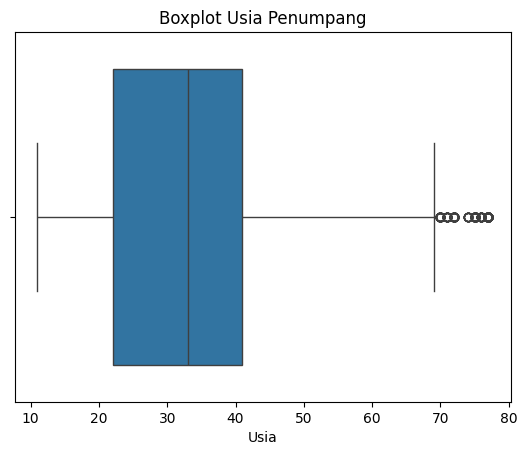

In [32]:
sns.boxplot(x = df['age'])
plt.title('Boxplot Usia Penumpang')
plt.xlabel('Usia')
plt.show()

Insight:

- Terdapat outlier pada persebaran usia yaitu diatas usia 70 tahun.
- Namun, outlier tersebut tidak perlu dihilangkan untuk keaslian data.

#### Pay Amount

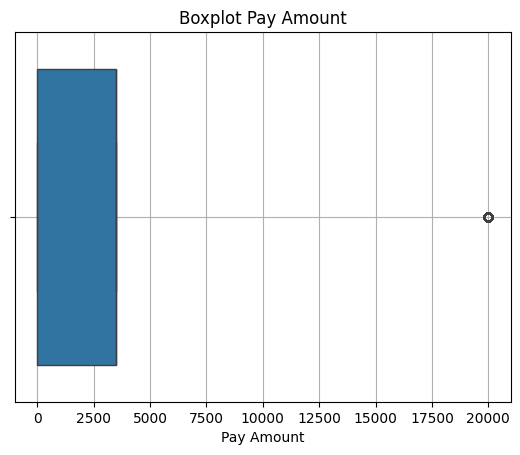

In [33]:
sns.boxplot(x = df['payAmount'])
plt.title('Boxplot Pay Amount')
plt.xlabel('Pay Amount')
plt.grid(True)
plt.show()

Insight:

- Terdapat satu outlier yaitu Pay Amount 20.000.
- Namun, outlier tersebut tidak perlu dihilangkan untuk keaslian data.

Membuat DataFrame sesuai kebutuhan analisis

In [34]:
df_pagi = df[(df['rushHour'] == 'Morning Rush Hour') & (df['dayCategory'] == 'Weekday')]

In [35]:
df_sore = df[(df['rushHour'] == 'Evening Rush Hour') & (df['dayCategory'] == 'Weekday')]

In [36]:
df_non = df[(df['rushHour'] == 'Non Rush Hour') & (df['dayCategory'] == 'Weekday')]

In [37]:
df_weekday = df[df['dayCategory'] == 'Weekday']

In [38]:
df_weekend = df[df['dayCategory'] == 'Weekend']

Menyimpan ke csv

In [39]:
df.to_csv('Transjakarta_clean.csv', index = False)

In [40]:
df_pagi.to_csv('df_pagi.csv', index = False)

In [41]:
df_sore.to_csv('df_sore.csv', index = False)

In [42]:
df_non.to_csv('df_non.csv', index = False)

In [43]:
df_weekday.to_csv('df_weekday.csv', index = False)

In [44]:
df_weekend.to_csv('df_weekend.csv', index = False)

## Analisis Weekday Transjakarta
---
Sebelum dilakukan analisis weekday transjakarta, diperlukan beberapa pengujian untuk membuktikan bahwa jumlah penumpang pada weekday berbeda dibanding weekend.

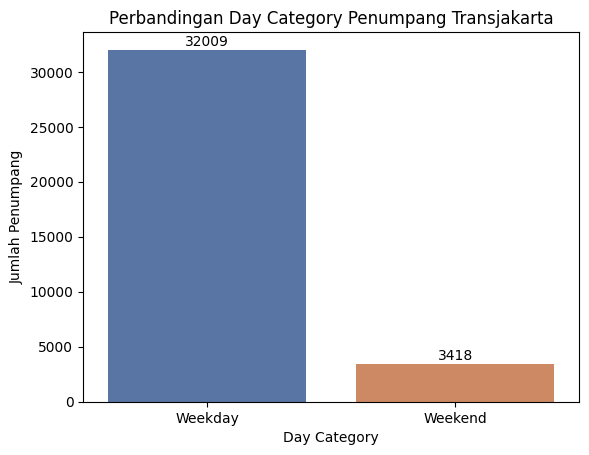

In [45]:
fig = sns.countplot(df, x = 'dayCategory', palette = {'Weekday': '#4C72B0', 'Weekend': '#DD8452'})
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Perbandingan Day Category Penumpang Transjakarta')
plt.xlabel('Day Category')
plt.ylabel('Jumlah Penumpang')
plt.show()

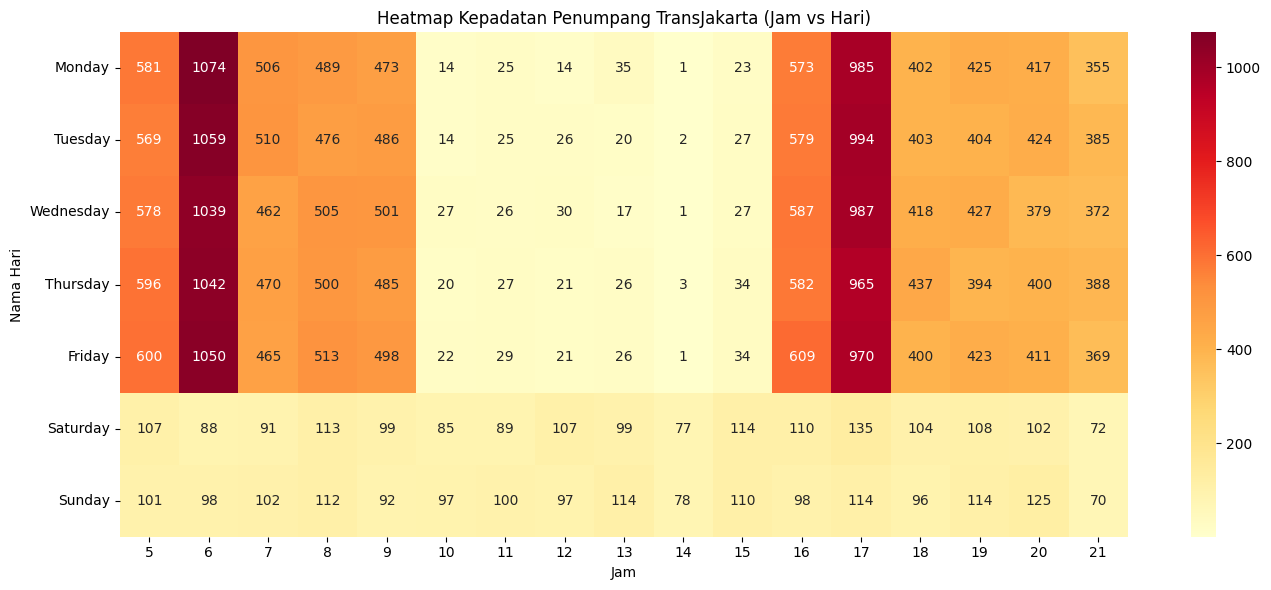

In [46]:
hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmapp = pd.crosstab(df['dayName'], df['hour']).reindex(hari)
plt.figure(figsize=(14, 6))
sns.heatmap(heatmapp, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Heatmap Kepadatan Penumpang TransJakarta (Jam vs Hari)')
plt.xlabel('Jam')
plt.ylabel('Nama Hari')
plt.tight_layout()
plt.show()

In [47]:
pivot = df.pivot_table(index = 'dayName', columns = 'hour', values = 'transID', aggfunc = 'count')
weekdayyy = pivot.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].values.flatten()
weekenddd = pivot.loc[['Saturday', 'Sunday']].values.flatten()

stat, p_value = mannwhitneyu(weekdayyy, weekenddd, alternative = 'two-sided')
print(f'Uji Mann-Whitney U:')
print(f'P-Value: {p_value}')

if p_value < 0.05:
    print('Terdapat perbedaan signifikan antara jumlah penumpang di weekday dan weekend.')
else:
    print('Tidak terdapat perbedaan signifikan antara jumlah penumpang di weekday dan weekend.')

Uji Mann-Whitney U:
P-Value: 0.012515126215494846
Terdapat perbedaan signifikan antara jumlah penumpang di weekday dan weekend.


**Insight**
- Terdapat perbandingan yang sangat jauh antara penumpang yang menggunakan transjakarta pada weekday dan weekend.
- Hal ini dapat diartikan pada weekday banyak orang yang menjadikan transjakarta sebagai moda transportasi utama.
- Demi meningkatkan kualitas transjakarta, berdasarkan pengujian Mann-Whitney U diperlukan analisis lebih lanjut pada weekday

#### 1. Demografi Pengguna

##### Berdasarkan Jenis Kelamin

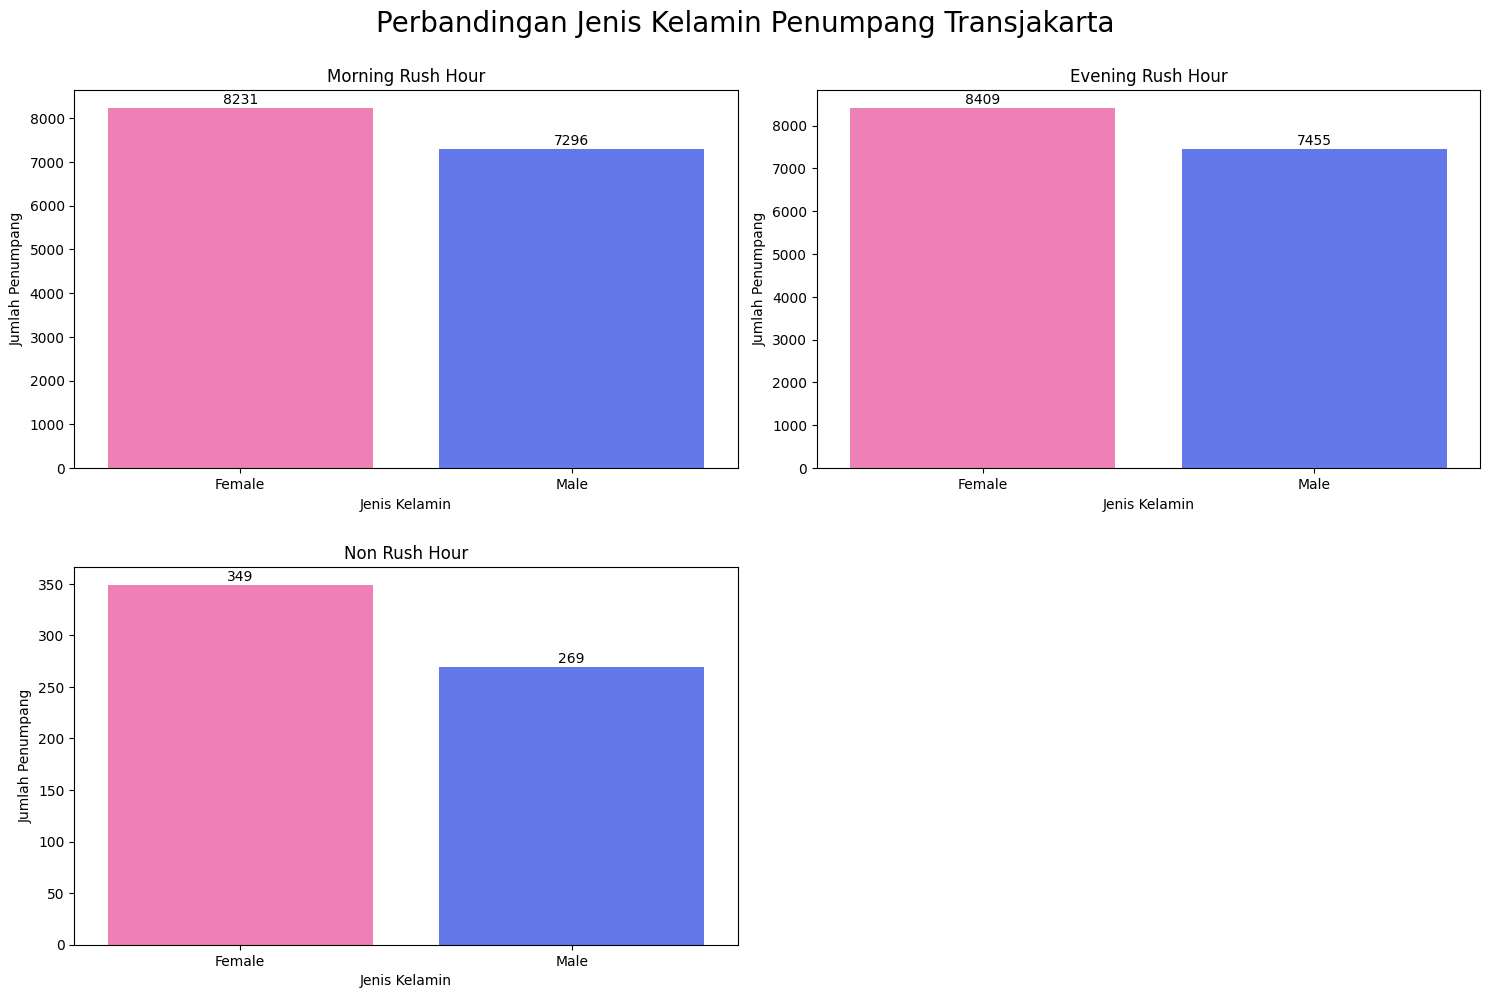

In [48]:
plt.figure(figsize = (15,10))
plt.suptitle('Perbandingan Jenis Kelamin Penumpang Transjakarta', size = 20, y = 0.95)
plt.subplot(2,2,1)
fig = sns.countplot(df_pagi, x = 'payCardSex', palette = {'Male': '#4D6AFF', 'Female': '#FF6FB5'})
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Morning Rush Hour')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')

plt.subplot(2,2,2)
fig = sns.countplot(df_sore, x = 'payCardSex', palette = {'Male': '#4D6AFF', 'Female': '#FF6FB5'})
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Evening Rush Hour')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')

plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=4)

plt.subplot(2,2,3)
fig = sns.countplot(df_non, x = 'payCardSex', palette = {'Male': '#4D6AFF', 'Female': '#FF6FB5'})
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Non Rush Hour')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')

plt.show()

In [49]:
rhjk = pd.crosstab(df_weekday['rushHour'], df_weekday['payCardSex'])

chi2, p_value, dof, expected = chi2_contingency(rhjk)
p_value

print(f'Uji Chi Squared:')
print(f'P-Value: {p_value}')

if p_value < 0.05:
    print('Terdapat hubungan signifikan antara kategori rush hour dan jenis kelamin.')
else:
    print('Tidak terdapat hubungan signifikan antara kategori rush hour dan jenis kelamin.')

Uji Chi Squared:
P-Value: 0.23229454607520722
Tidak terdapat hubungan signifikan antara kategori rush hour dan jenis kelamin.


Insight:

- Pada Morning Rush Hour penumpang transjakarta paling banyak adalah perempuan.
- Pada Evening Rush Hour penumpang transjakarta paling banyak adalah perempuan.
- Pada Non Rush Hour penumpang transjakarta paling banyak adalah perempuan.
- Walaupun pada seluruh penumpang lebih banyak perempuan, namun berdasarkan uji chi-squared tidak ada hubungan antara rush hour dan jenis kelamin.

##### Berdasarkan Metode Pembayaran

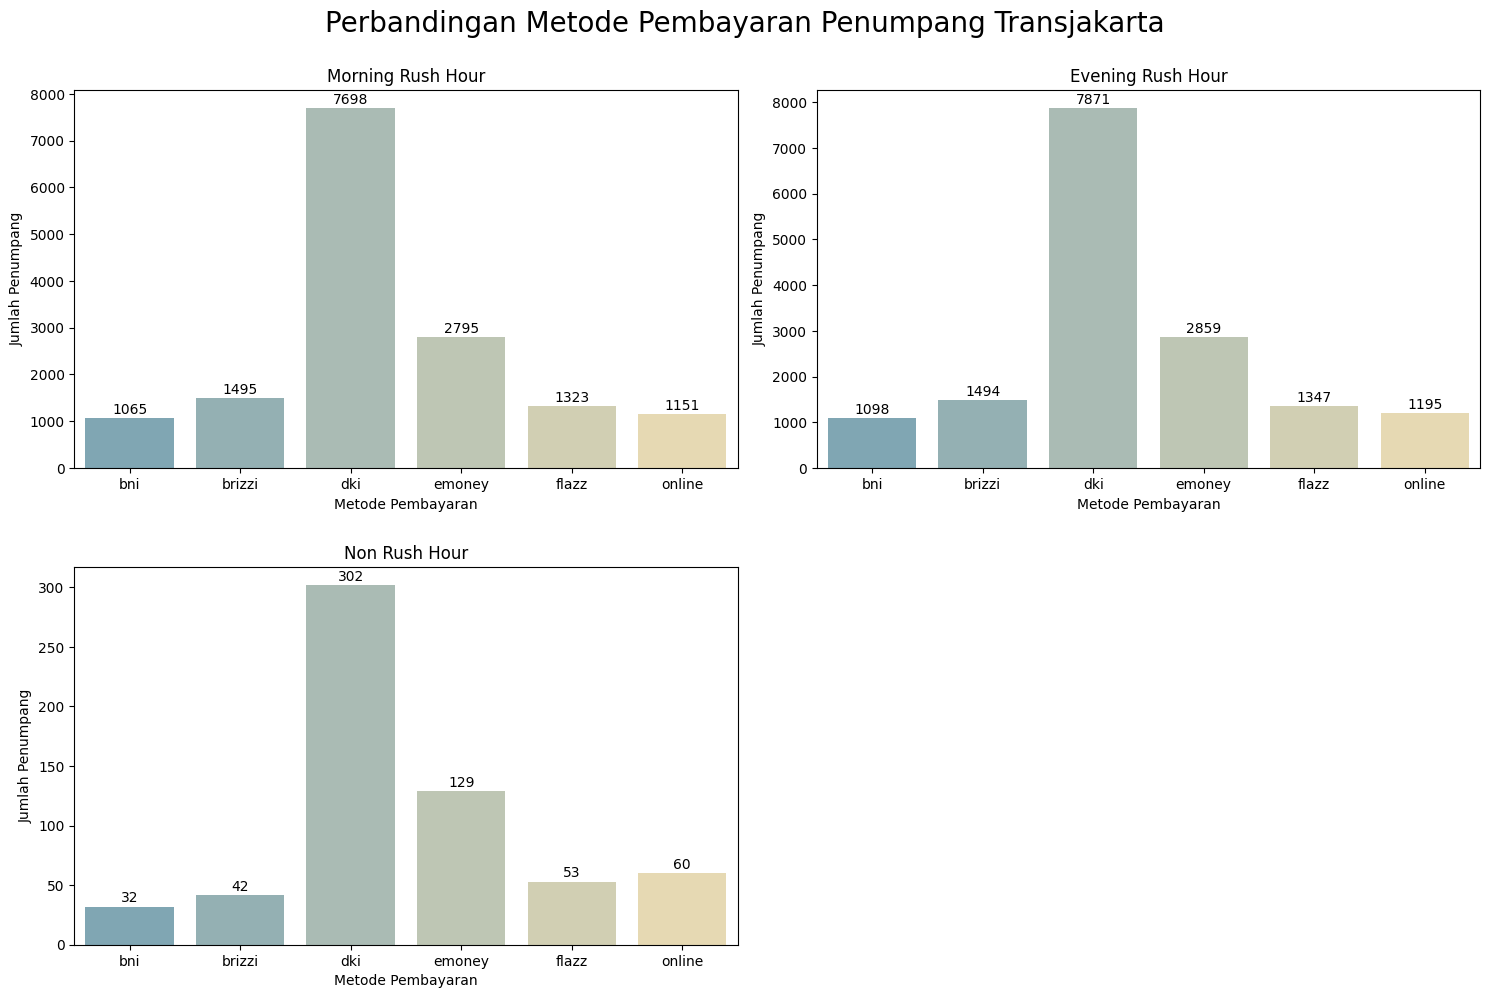

In [50]:
plt.figure(figsize = (15,10))
plt.suptitle('Perbandingan Metode Pembayaran Penumpang Transjakarta', size = 20, y = 0.95)
plt.subplot(2,2,1)
fig = sns.countplot(df_pagi, x = 'payCardBank', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Morning Rush Hour')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Penumpang')

plt.subplot(2,2,2)
fig = sns.countplot(df_sore, x = 'payCardBank', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Evening Rush Hour')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Penumpang')

plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=4)

plt.subplot(2,2,3)
fig = sns.countplot(df_non, x = 'payCardBank', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Non Rush Hour')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Penumpang')

plt.show()

In [51]:
rhmp = pd.crosstab(df_weekday['rushHour'], df_weekday['payCardBank'])

chi2, p_value, dof, expected = chi2_contingency(rhmp)
p_value

print(f'Uji Chi Squared:')
print(f'P-Value: {p_value}')

if p_value < 0.05:
    print('Terdapat hubungan signifikan antara kategori rush hour dan metode pembayaran.')
else:
    print('Tidak terdapat hubungan signifikan antara kategori rush hour dan metode pembayaran.')

Uji Chi Squared:
P-Value: 0.1407610824768923
Tidak terdapat hubungan signifikan antara kategori rush hour dan metode pembayaran.


Insight:

- Pada Morning Rush Hour penumpang transjakarta paling banyak menggunakan metode pembayaran Bank DKI.
- Pada Evening Rush Hour penumpang transjakarta paling banyak menggunakan metode pembayaran Bank DKI.
- Pada Non Rush Hour penumpang transjakarta paling banyak menggunakan metode pembayaran Bank DKI.
- Walaupun pada seluruh penumpang lebih banyak menggunakan metode pembayaran Bank DKI, namun berdasarkan pengujian chi-squared tidak ada hubungan antara rush hour dan metode pembayaran.

##### Berdasarkan Usia

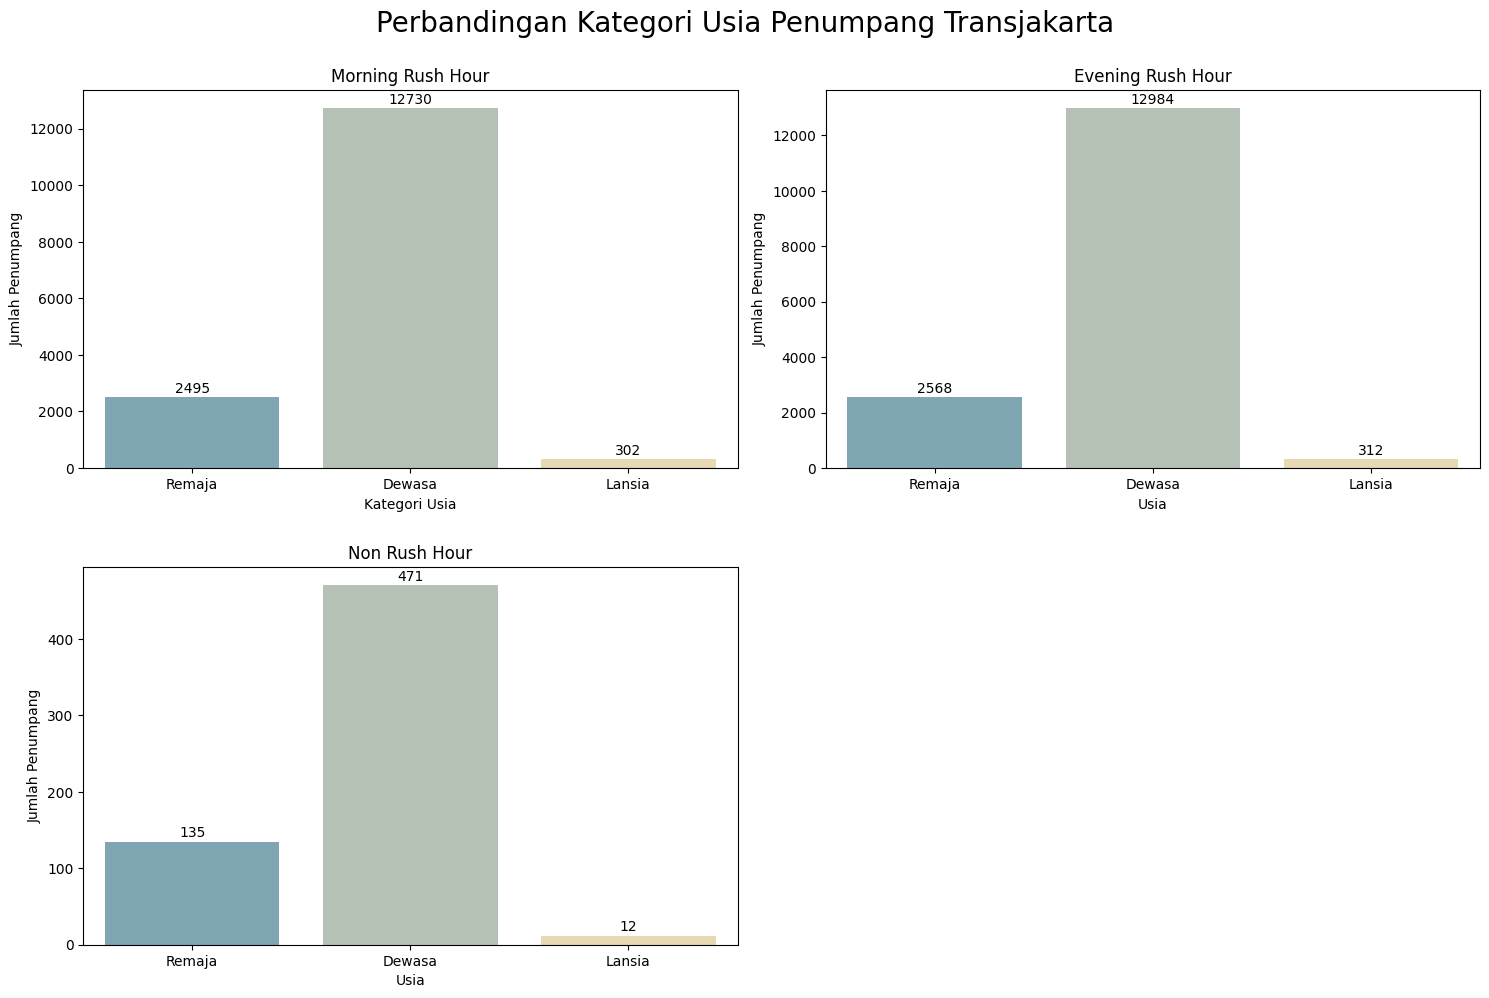

In [52]:
plt.figure(figsize = (15,10))
plt.suptitle('Perbandingan Kategori Usia Penumpang Transjakarta', size = 20, y = 0.95)
plt.subplot(2,2,1)
fig = sns.countplot(df_pagi, x = 'ageCategory', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Morning Rush Hour')
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah Penumpang')

plt.subplot(2,2,2)
fig = sns.countplot(df_sore, x = 'ageCategory', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Evening Rush Hour')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')

plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=4)

plt.subplot(2,2,3)
fig = sns.countplot(df_non, x = 'ageCategory', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Non Rush Hour')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')

plt.show()

In [53]:
rhusia = pd.crosstab(df_weekday['rushHour'], df_weekday['ageCategory'])

chi2, p_value, dof, expected = chi2_contingency(rhusia)
p_value

print(f'Uji Chi Squared:')
print(f'P-Value: {p_value}')

if p_value < 0.05:
    print('Terdapat hubungan signifikan antara kategori rush hour dan kategori usia.')
else:
    print('Tidak terdapat hubungan signifikan antara kategori rush hour dan kategori usia.')

Uji Chi Squared:
P-Value: 0.005346059667363981
Terdapat hubungan signifikan antara kategori rush hour dan kategori usia.


Insight:

- Pada Morning Rush Hour penumpang dengan kategori usia paling banyak adalah kategori dewasa.
- Pada Evening Rush Hour penumpang dengan kategori usia paling banyak adalah kategori dewasa.
- Pada Non Rush Hour penumpang dengan kategori usia paling banyak adalah kategori dewasa.
- Berdasarkan pengujian chi-squared ada hubungan antara rush hour dan kategori usia.
- Hal ini dapat terjadi dikarenakan kategori usia dewasa merupakan usia produktif.

#### 2. Total Penumpang Transjakarta

##### Total Penumpang Berdasarkan Tanggal

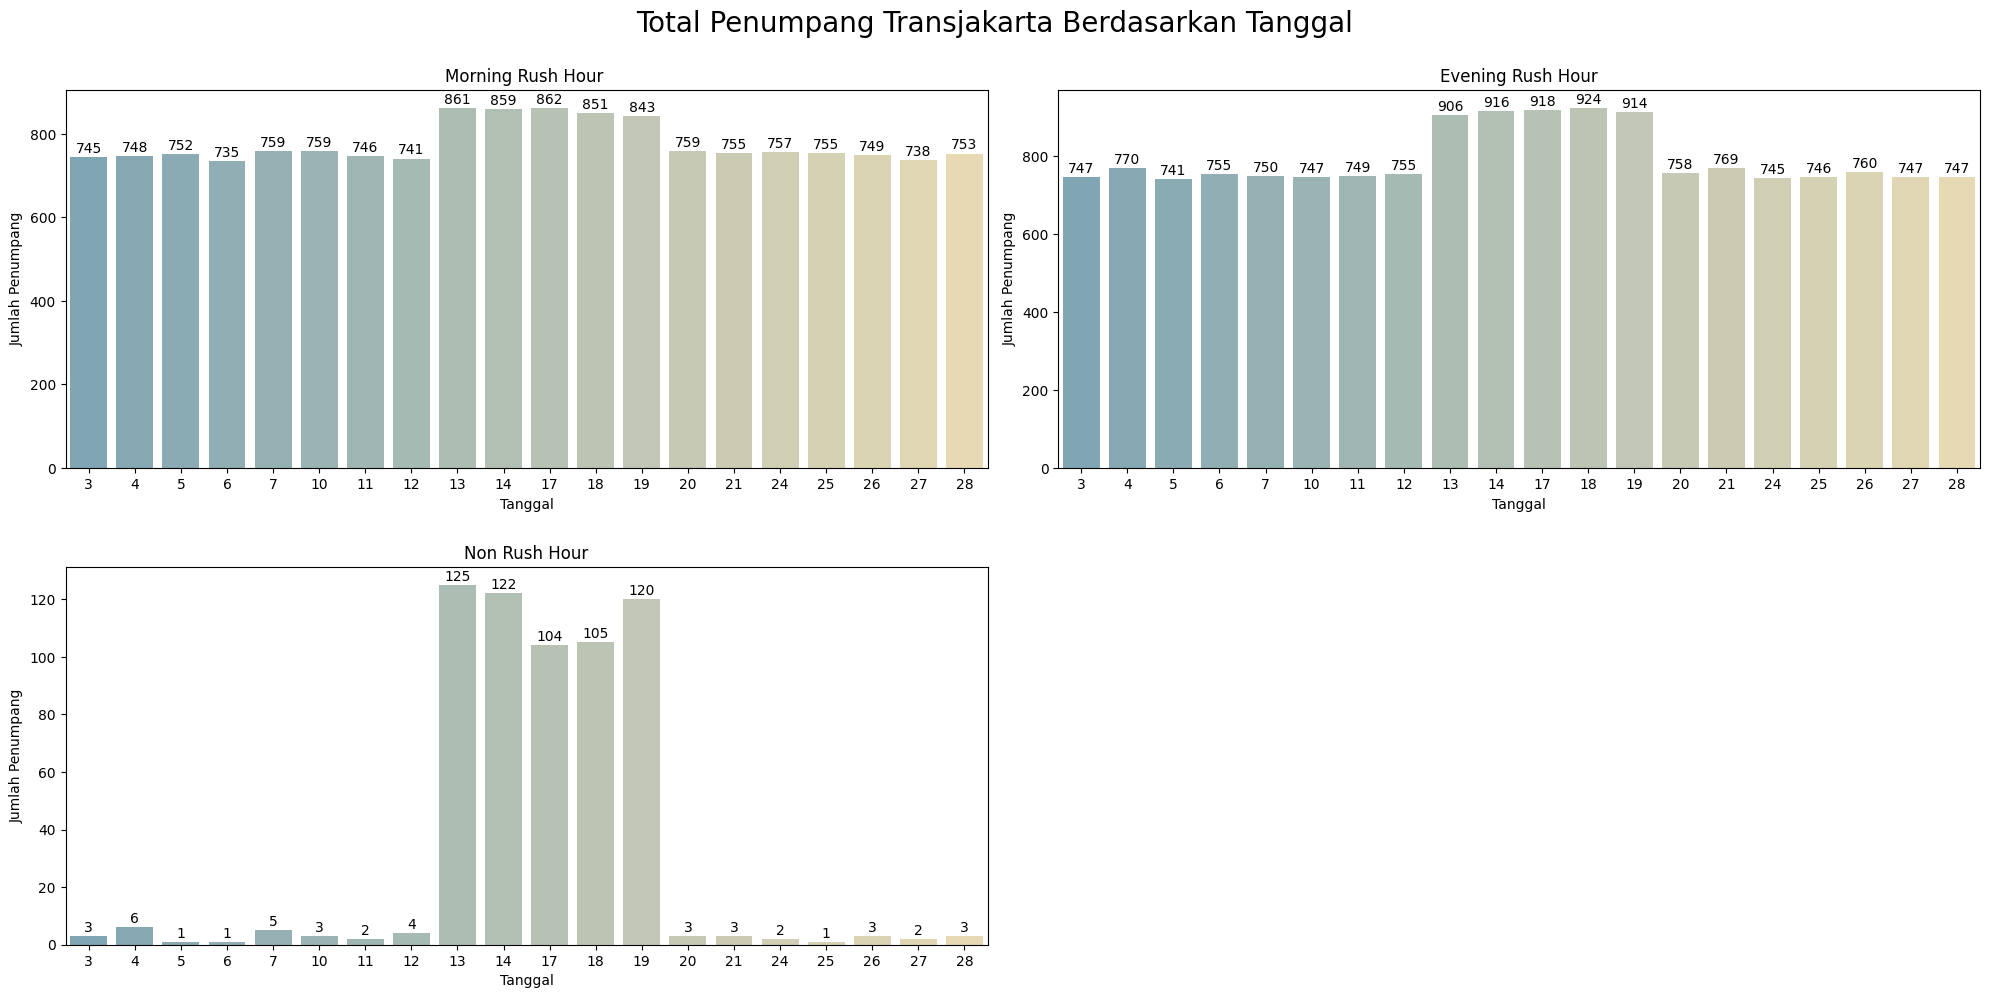

In [54]:
plt.figure(figsize = (20,10))
plt.suptitle('Total Penumpang Transjakarta Berdasarkan Tanggal', size = 20, y = 0.95)
plt.subplot(2,2,1)
fig = sns.countplot(df_pagi, x = 'date', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Morning Rush Hour ')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penumpang')

plt.subplot(2,2,2)
fig = sns.countplot(df_sore, x = 'date', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Evening Rush Hour')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penumpang')

plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=4)

plt.subplot(2,2,3)
fig = sns.countplot(df_non, x = 'date', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Non Rush Hour')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penumpang')

plt.show()

Insight:

- Jumlah penumpang pada weekday lebih tinggi pada rush hour dibanding non rush hour.
- Terdapat anomali pada non rush hour di tanggal 13-19, dimana jumlah penumpang melonjak menjadi lebih dari 100.

##### Total Penumpang Berdasarkan Hari

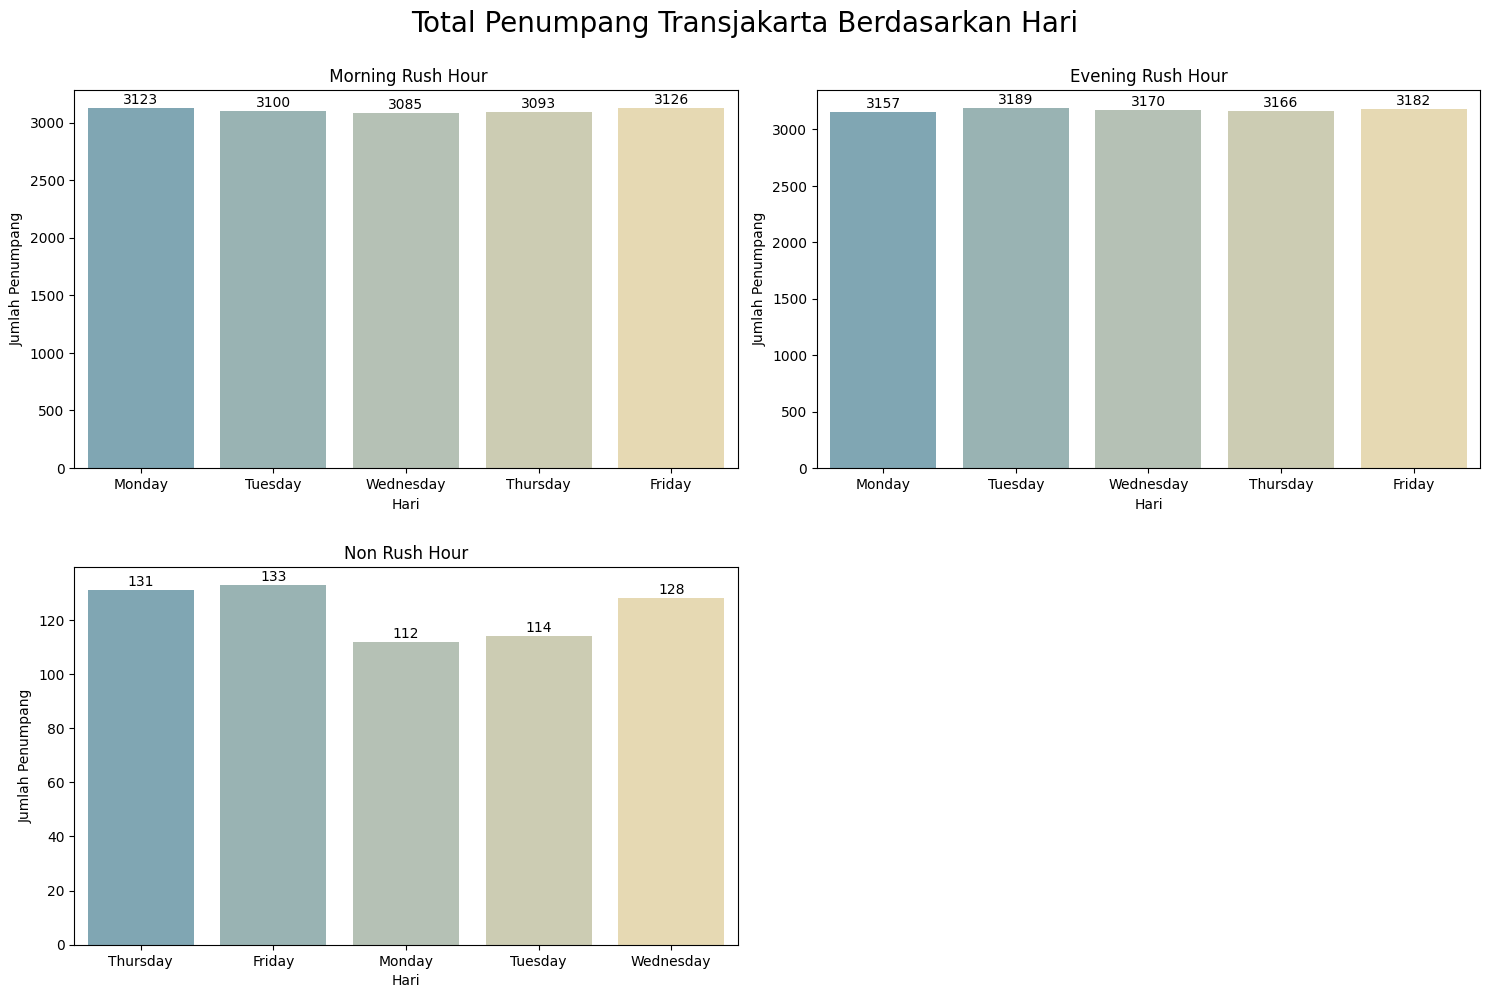

In [55]:
plt.figure(figsize = (15,10))
plt.suptitle('Total Penumpang Transjakarta Berdasarkan Hari', size = 20, y = 0.95)
plt.subplot(2,2,1)
fig = sns.countplot(df_pagi, x = 'dayName', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title(' Morning Rush Hour')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penumpang')

plt.subplot(2,2,2)
fig = sns.countplot(df_sore, x = 'dayName', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Evening Rush Hour')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penumpang')

plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=4)

plt.subplot(2,2,3)
fig = sns.countplot(df_non, x = 'dayName', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Non Rush Hour')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penumpang')

plt.show()

Insight:

- Jumlah penumpang konsisten pada morning dan evening rush hour berada di kisaran 3000-3200 penumpang.
- Hari jumat merupakan hari dimana jumlah penumpang tertinggi.
- Pola ini dapat diasumsikan bahwa pengguna transjakarta merupakan pekerja atau pelajar yang rutin menggunakan moda transportasi transjakarta.

##### Total Penumpang Berdasarkan Jam

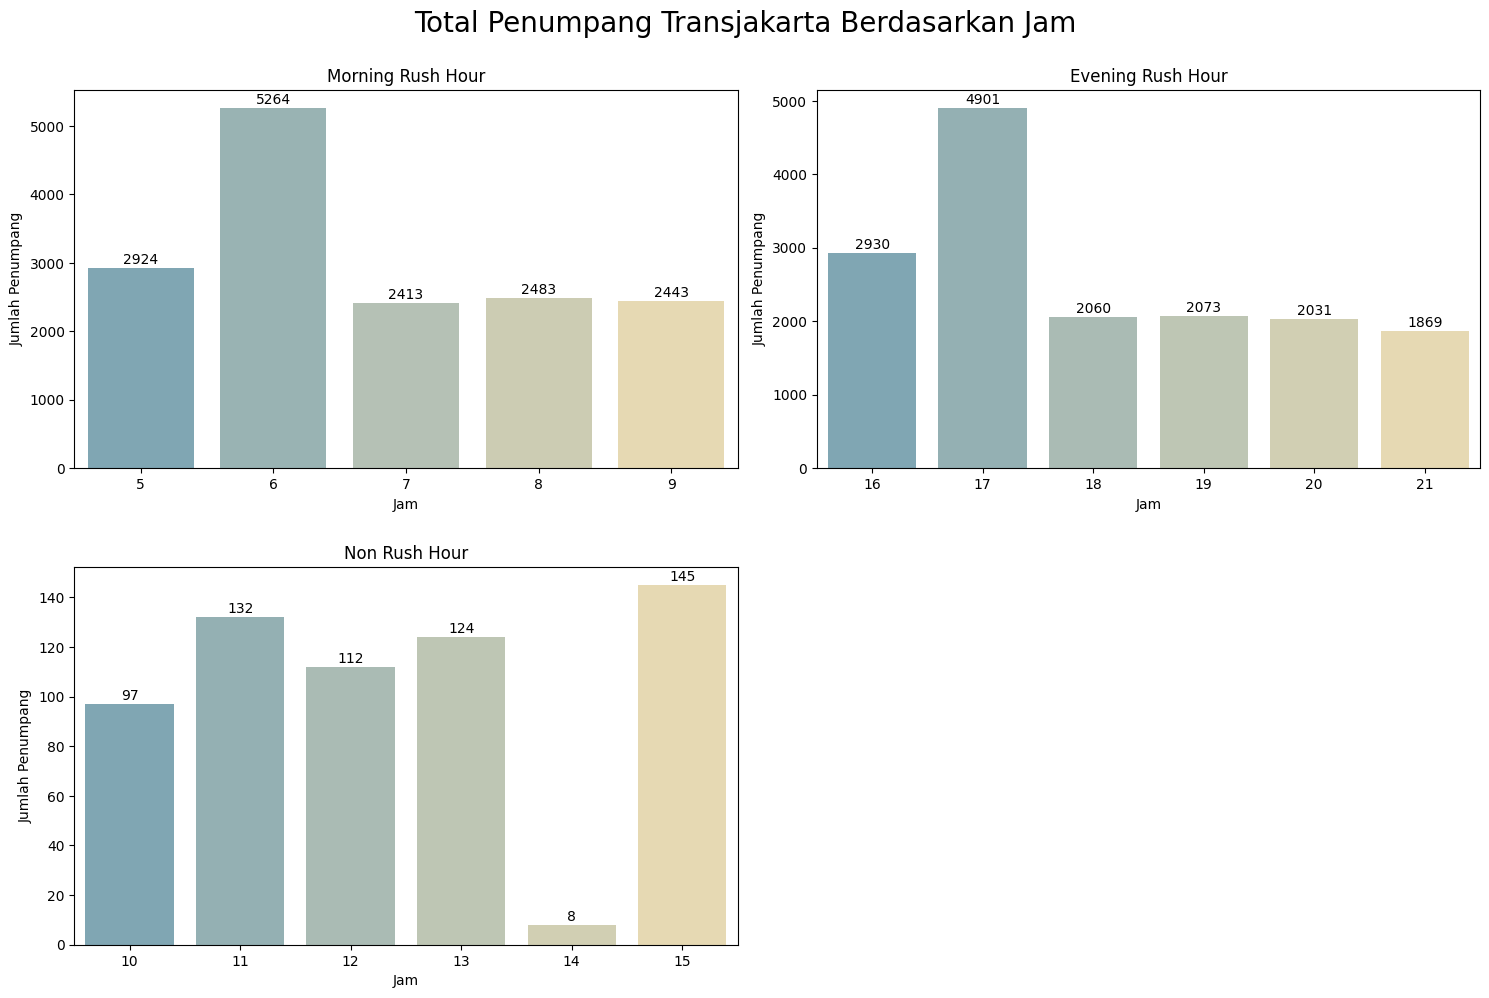

In [56]:
plt.figure(figsize = (15,10))
plt.suptitle('Total Penumpang Transjakarta Berdasarkan Jam', size = 20, y = 0.95)
plt.subplot(2,2,1)
fig = sns.countplot(df_pagi, x = 'hour', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Morning Rush Hour')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')

plt.subplot(2,2,2)
fig = sns.countplot(df_sore, x = 'hour', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Evening Rush Hour')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')

plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=4)

plt.subplot(2,2,3)
fig = sns.countplot(df_non, x = 'hour', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Non Rush Hour')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')

plt.show()

Insight:

- Pada Morning Rush Hour penumpang jam 6 merupakan waktu tersibuk di pagi hari. Hal ini dapat terjadi karena banyak penumpang yang berangkat lebih awal untuk menghindari kemacetan maupun mengejar jam masuk kantor.
- Pada Evening Rush Hour penumpang jam 17 merupakan waktu tersibuk di pagi hari. Hal ini dapat terjadi karena jam 17 merupakan jam pulang kantor.
- Pada Non Rush Hour penumpang jam 15 merupakan waktu tersibuk di pagi hari. Hal ini bisa saja terjadi karena persiapan pulang sekolah atau awal jam pulang kerja yang fleksibel. 

#### 3. Rute dan Perjalanan

##### Lokasi Tap In Stops Name Terbanyak

In [57]:
tapinmrh = df_pagi.groupby('tapInStopsName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(5)
tapinerh = df_sore.groupby('tapInStopsName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(5)
tapinnon = df_non.groupby('tapInStopsName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(5)

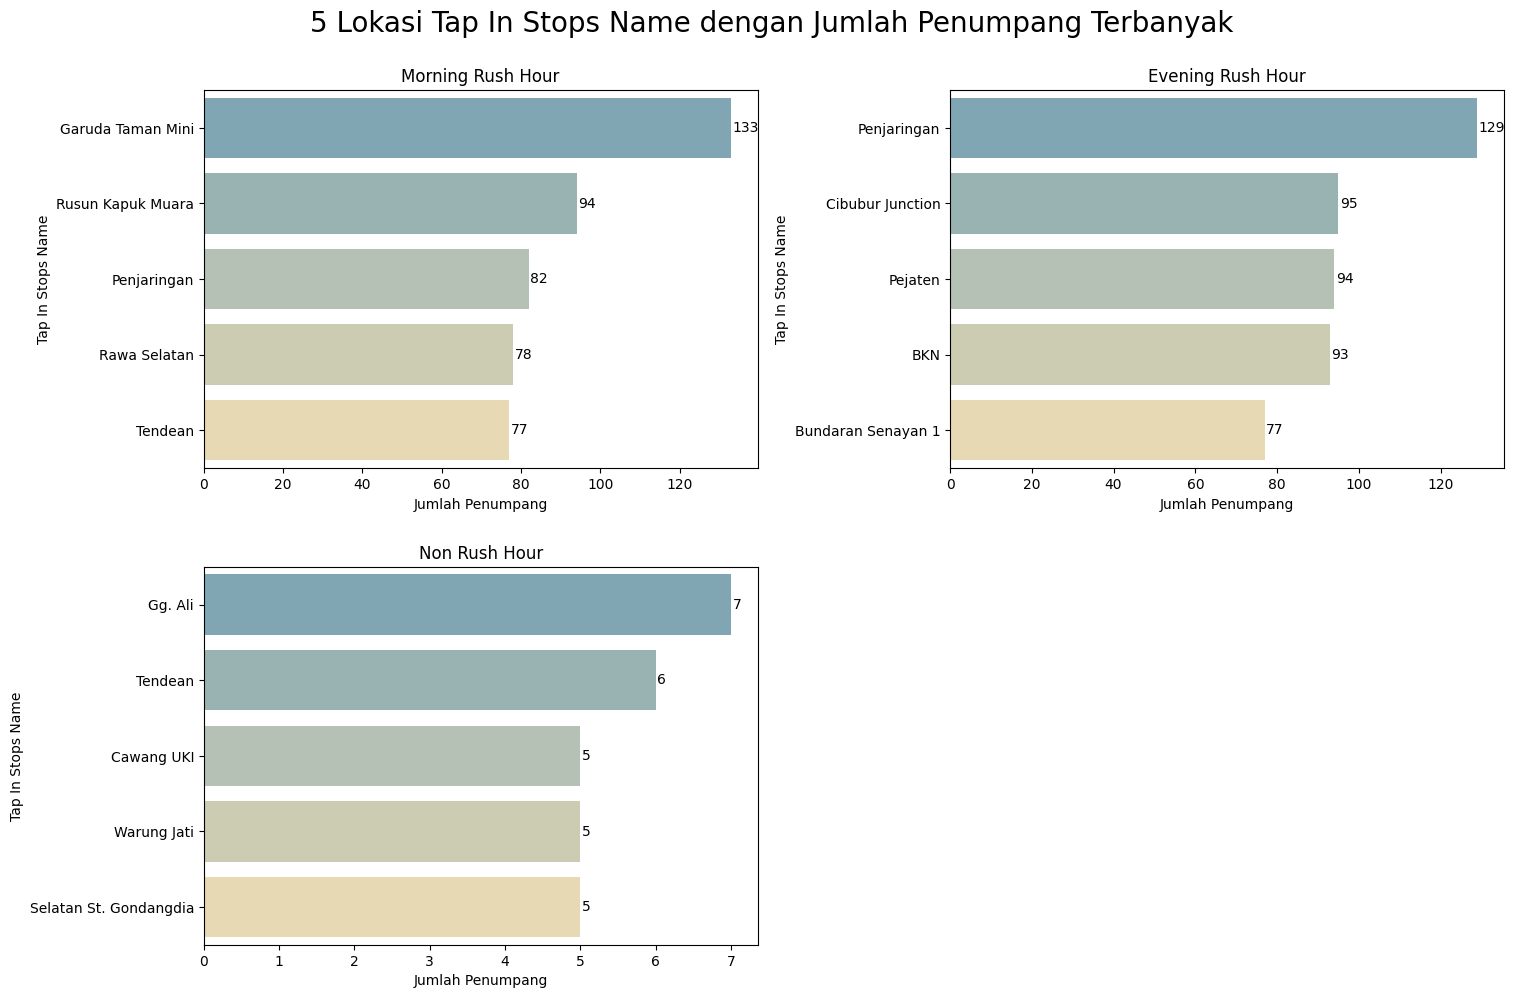

In [58]:
plt.figure(figsize = (15,10))
plt.suptitle('5 Lokasi Tap In Stops Name dengan Jumlah Penumpang Terbanyak', size = 20, y = 0.95)
plt.subplot(2,2,1)
fig = sns.barplot(tapinmrh, x = 'transID', y = 'tapInStopsName', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Morning Rush Hour')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Tap In Stops Name')

plt.subplot(2,2,2)
fig = sns.barplot(tapinerh, x = 'transID', y = 'tapInStopsName', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Evening Rush Hour')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Tap In Stops Name')

plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=4)

plt.subplot(2,2,3)
fig = sns.barplot(tapinnon, x = 'transID', y = 'tapInStopsName', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Non Rush Hour')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Tap In Stops Name')

plt.show()

Insight:

- Garuda Taman Mini menjadi titik keberangkatan terbanyak di pagi hari, menunjukkan banyak penumpang dari kawasan timur Jakarta.
- Rusun Kapuk Muara dan Penjaringan mengindikasikan keberangkatan dari area permukiman padat.
- Cibubur Junction, BKN, dan Pejaten adalah kawasan perkantoran atau transit besar.
- Bundaran Senayan 1 menunjukkan adanya aktivitas pekerja dari area pusat kota.

##### Lokasi Tap Out Stops Name Terbanyak

In [59]:
tapoutmrh = df_pagi.groupby('tapOutStopsName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(5)
tapouterh = df_sore.groupby('tapOutStopsName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(5)
tapoutnon = df_non.groupby('tapOutStopsName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(5)

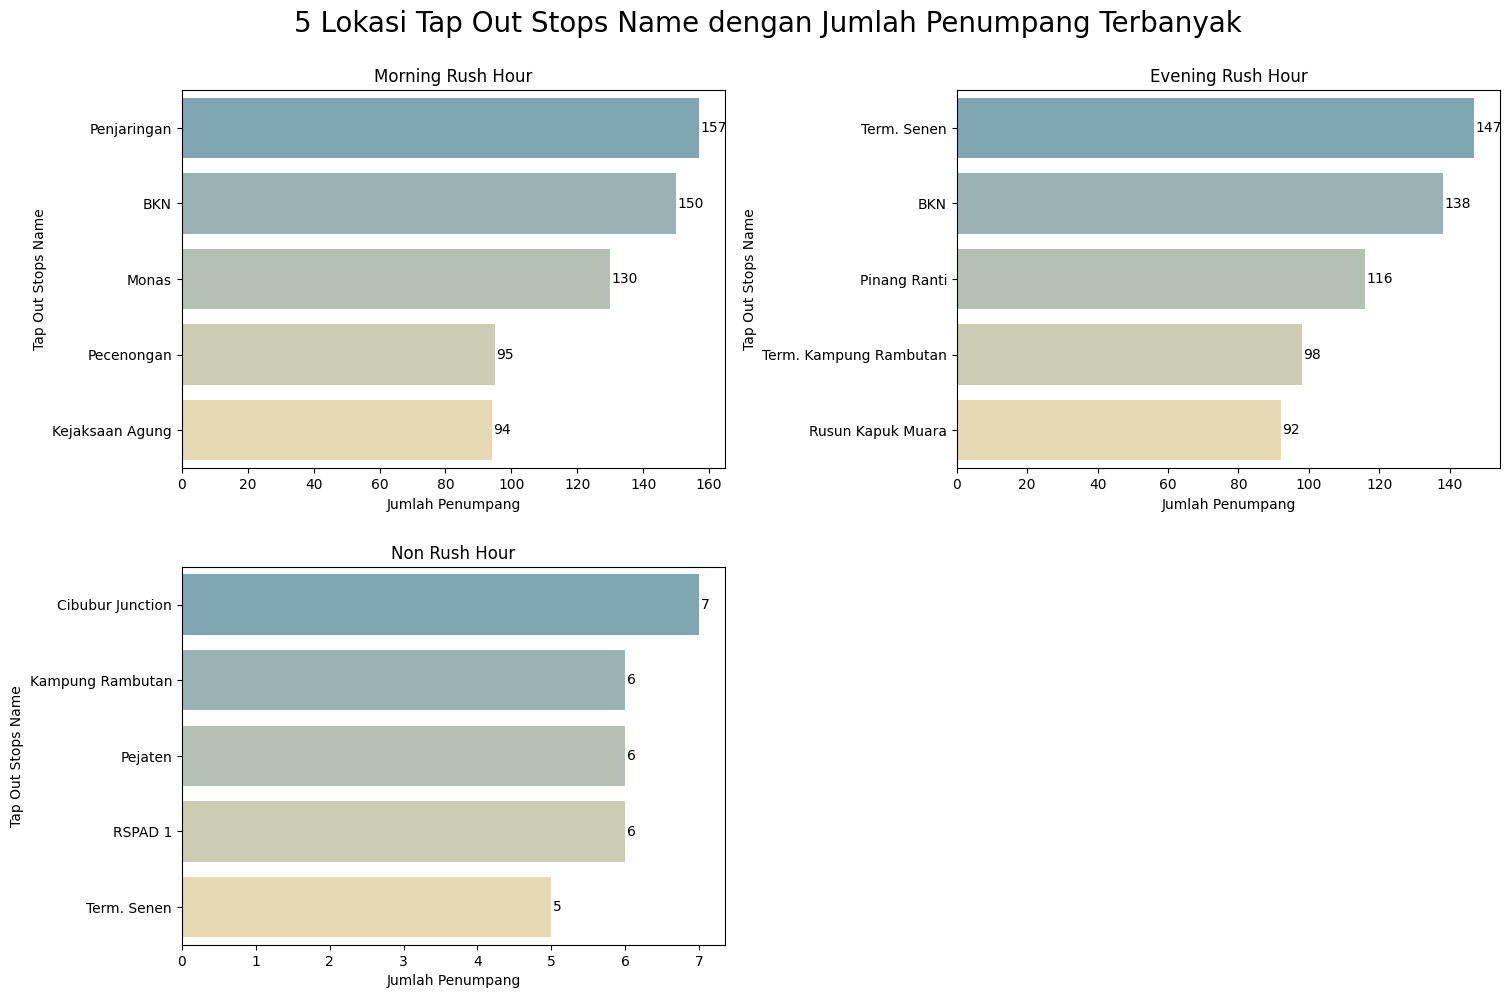

In [60]:
plt.figure(figsize = (15,10))
plt.suptitle('5 Lokasi Tap Out Stops Name dengan Jumlah Penumpang Terbanyak', size = 20, y = 0.95)
plt.subplot(2,2,1)
fig = sns.barplot(tapoutmrh, x = 'transID', y = 'tapOutStopsName', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Morning Rush Hour')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Tap Out Stops Name')

plt.subplot(2,2,2)
fig = sns.barplot(tapouterh, x = 'transID', y = 'tapOutStopsName', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Evening Rush Hour')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Tap Out Stops Name')

plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=4)

plt.subplot(2,2,3)
fig = sns.barplot(tapoutnon, x = 'transID', y = 'tapOutStopsName', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Non Rush Hour')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Tap Out Stops Name')

plt.show()

Insigth:

- Penjaringan dan BKN menjadi destinasi utama pagi hari, mengindikasikan adanya pusat aktivitas atau perkantoran besar.
- Monas juga menunjukkan intensitas tinggi, bisa berkaitan dengan aktivitas wisata, pemerintahan, atau transit.
- Terminal Senen dan BKN tetap ramai di sore hari, menunjukkan kombinasi aktivitas transit, perkantoran, dan perdagangan.
- Rusun Kapuk Muara sebagai titik hunian kembali disorot di sore hari, mendukung tren pulang kerja.

##### 5 Corridor Name dengan Jumlah Penumpang Terbanyak

In [61]:
cormrh = df_pagi.groupby('corridorName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(5)
corerh = df_sore.groupby('corridorName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(5)
cornon = df_non.groupby('corridorName')[['transID']].count().sort_values(by = 'transID', ascending = False).reset_index().head(5)

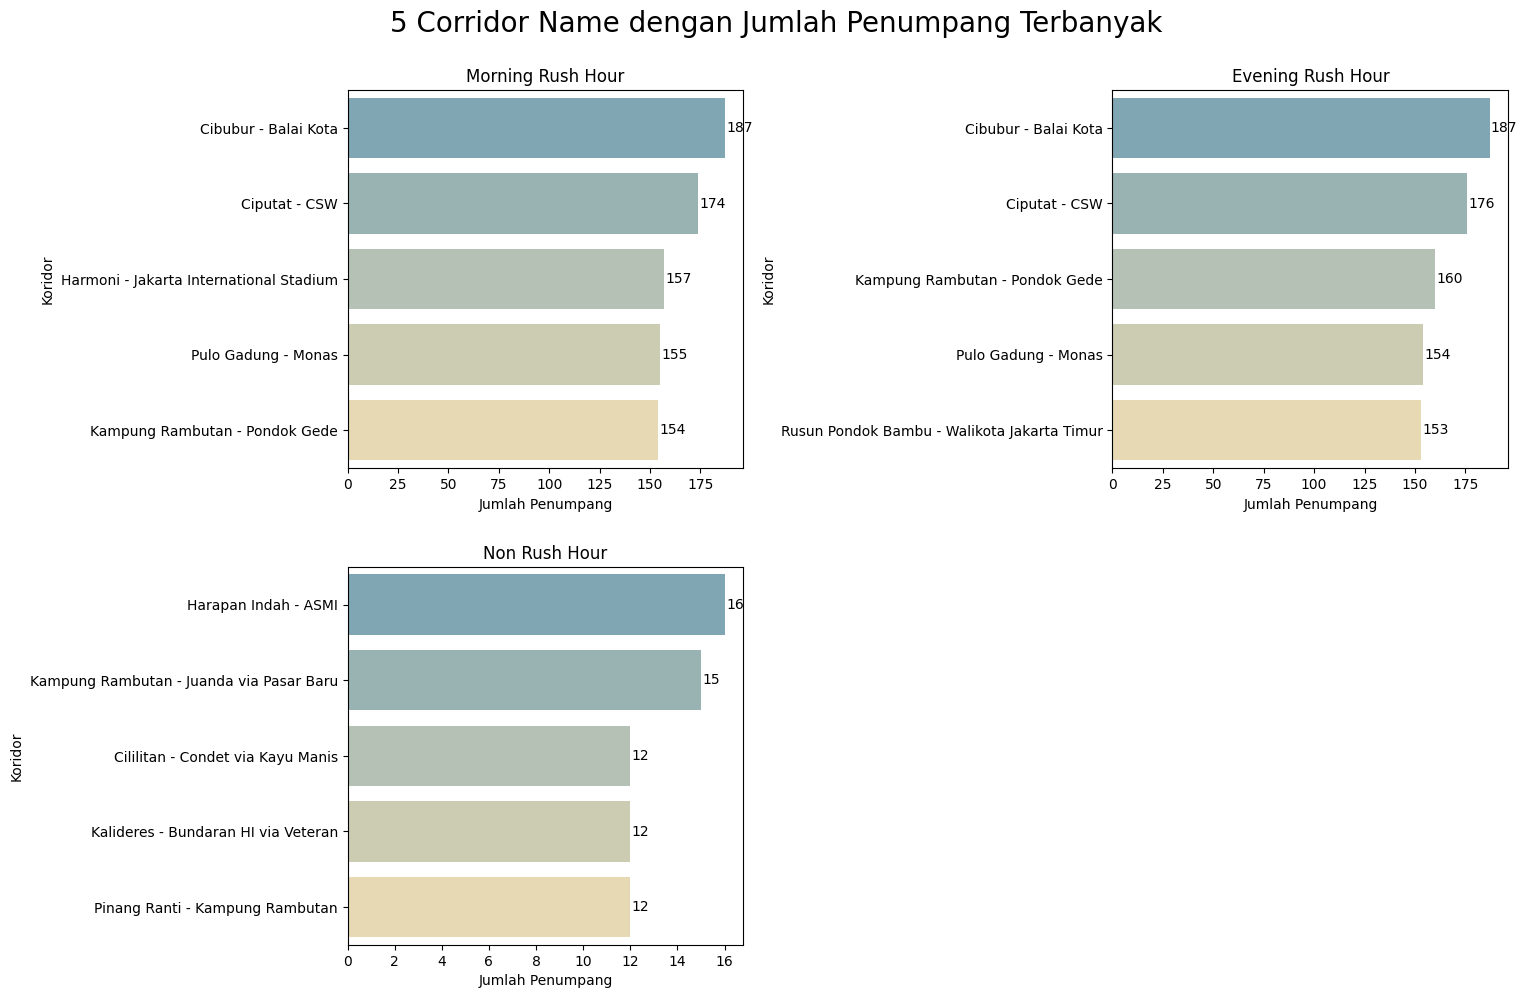

In [62]:
plt.figure(figsize = (15,10))
plt.suptitle('5 Corridor Name dengan Jumlah Penumpang Terbanyak', size = 20, y = 0.95)
plt.subplot(2,2,1)
fig = sns.barplot(cormrh, x = 'transID', y = 'corridorName', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Morning Rush Hour')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Koridor')

plt.subplot(2,2,2)
fig = sns.barplot(corerh, x = 'transID', y = 'corridorName', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Evening Rush Hour')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Koridor')

plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=4)

plt.subplot(2,2,3)
fig = sns.barplot(cornon, x = 'transID', y = 'corridorName', palette = 'blend:#7AB,#EDA')
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Non Rush Hour')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Koridor')

plt.show()

Insight:

- Koridor Cibubur - Balai Kota merupakan koridor paling sibuk di jam sibuk pagi maupun sore.
- Hal ini mengindikasikan bahwa penggunakan koridor ini sama banyak untuk kedua arah perjalanan.
- Hal ini dapat terjadi karena cibubur merupakan kawasan hunian dan balai kota yang berada di kawasan monas/gambir yang merupakan jantung bisnis kota jakarta.

- Koridor Ciputat - CSW merupakan koridor kedua tersibuk di jam sibuk pagi maupun sore.
- Hal ini dapat terjadi karena ciputat merupakan kawasan hunian yang berada di perbatasan jakarta dan tangerang selatan.
- CSW merupakan halte yang terintegrasi dengan stasiun MRT.

## Kesimpulan dan Rekomendasi

### Kesimpulan

1. Karakteristik demografi pengguna Transjakarta pada hari kerja
- Pengguna transjakarta lebih banyak perempuan dibanding laki-laki.
- Pengguna transjakarta paling banyak menggunakan metode pembayaran Bank DKI dibanding metode lain.
- Pengguna transjakarta paling banyak adalah kategori dewasa dibanding kategori usia lain.
2. Jumlah penumpang Transjakarta bervariasi berdasarkan waktu
- Tanggal 13-19 April 2023 merupakan rentang tanggal dengan jumlah penumpang terbanyak.
- Hari jumat merupakan hari dengan jumlah terbanyak dibanding hari lain.
- Jam 6 pagi merupakan jam dengan jumlah penumpang terbanyak pada pagi hari.
- Jam 5 sore merupakan jam dengan jumlah penumpang terbanyak pada sore hari.
3. Pola perjalanan dan penggunaan rute Transjakarta pada hari kerja
- Pada pagi hari halte Garuda Taman Mini merupakan halte tap in terbanyak.
- Pada sore hari halte Penjaringan merupakan halte tap in terbanyak.
- Pada pagi hari halte Penjaringan merupakan halte tap out terbanyak.
- Pada sore hari halte Terminal Senen merupakan halte tap out terbanyak.
- Pada pagi hari dan sore hari koridor Cibubur-Balai kota merupakan koridor dengan jumlah penumpang terbanyak.

### Rekomendasi

1. Demografi pengguna
- Menambahan fasilitas keamanan dan kenyamanan bagi penumpang perempuan seperti:
    - Bus Wanita
    - Penambahan petugas di halte dan bus
    - Area tunggu khusus wanita
- Melakukan kerja sama dengan Bank DKI seperti mendapat point untuk pengguna Bank DKI.

2. Waktu
- Penambahan armada pada jam 6 pagi dan 5 sore.
- Penambahan armada pada hari jumat karena jumlah penumpang tertinggi pada hari jumat.

3. Optimalisasi Halte dan Rute
- Peningkatan kapasitas halte seperti penambahan gate untuk tap in dan tap out.
- Penambahan armada dan peningkatan fasilitas bagi koridor Cibubur-Balai Kota baik di pagi dan sore hari.
- Melakukan optimalisasi untuk perjalanan non rush hour seperti penyesuaian jumlah armada yang beroperasi